Currently there are two implementation of the SFS:  

$$\log \mathrm{SFR}_\mathrm{SFS}(M_*, z) = m_{M_*}  (\log\,M_* - 10.5) + m_z (z - 0.05) - 0.11$$

$$\log \mathrm{SFR}_\mathrm{SFS}(M_*, z) = (0.58 (\log\,M_* - 10.5) - 0.13868) + (z - 0.05) (m (\log\,M_* - 10.5) + b)$$

Lets determine the range of parameters that encompass observations, which will act as priors

In [1]:
import numpy as np 
# -- centralms -- 
from centralMS import util as UT
from centralMS import sfh as SFH
from centralMS import catalog as Cat

In [2]:
import corner as DFM
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [17]:
mbin = np.linspace(9., 12., 100)

In [9]:
fsdss = Cat.SDSSgroupcat(Mrcut=18, censat='central')
sdss = fsdss.Read()

(-3.0, 1.0)

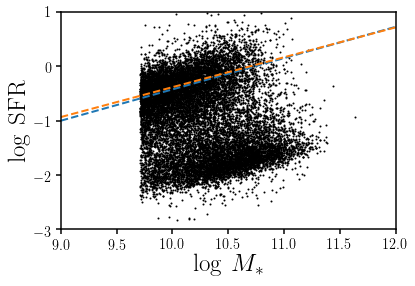

In [22]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(sdss['mstar'], sdss['sfr'], c='k', s=1)
sub.plot(mbin, SFH.SFR_sfms(mbin, 0.05, {'name': 'anchored', 'slope':0, 'amp': 0}), c='C0', lw=2, ls='--')
sub.plot(mbin, SFH.SFR_sfms(mbin, 0.05, {'name': 'flex', 'mslope': 0.55, 'zslope': 1.2}), c='C1', lw=2, ls='--')
sub.set_xlabel('$\log\,M_*$', fontsize=25)
sub.set_xlim([9., 12.])
sub.set_ylabel('$\log\,\mathrm{SFR}$', fontsize=25)
sub.set_ylim([-3., 1.])

In [23]:
# Lee et al. (2015)
logSFR_lee = lambda mm: 1.53 - np.log10(1 + (10**mm/10**(10.10))**-1.26)
# Noeske et al. (2007) 0.85 < z< 1.10 (by eye)
logSFR_noeske = lambda mm: (1.580 - 1.064)/(11.229 - 10.029)*(mm - 10.0285) + 1.0637
# Moustakas et al. (2013) 0.8 < z < 1. (by eye)
logSFR_primus = lambda mm: (1.3320 - 1.296)/(10.49 - 9.555) * (mm-9.555) + 1.297
# Hahn et al. (2017)
logSFR_hahn = lambda mm: 0.53*(mm-10.5) + 1.1*(1.-0.05) - 0.11

(-1.0, 3.0)

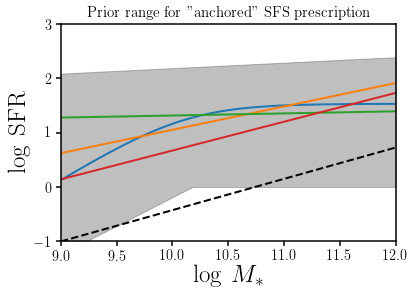

In [62]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.set_title('Prior range for "anchored" SFS prescription', fontsize=15)
sub.plot(mbin, logSFR_lee(mbin), c='C0', lw=2, ls='-')
sub.plot(mbin, logSFR_noeske(mbin), c='C1', lw=2, ls='-')
sub.plot(mbin, logSFR_primus(mbin), c='C2', lw=2, ls='-')
sub.plot(mbin, logSFR_hahn(mbin), c='C3', lw=2, ls='-')

sfs_anchored = np.zeros((len(mbin), 4))
sfs_anchored[:,0] = SFH.SFR_sfms(mbin, 1., {'name': 'anchored', 'slope':-0.5, 'amp': 0.5})
sfs_anchored[:,1] = SFH.SFR_sfms(mbin, 1., {'name': 'anchored', 'slope':-0.5, 'amp': 2.5})
sfs_anchored[:,2] = SFH.SFR_sfms(mbin, 1., {'name': 'anchored', 'slope':0.5, 'amp': 2.5})
sfs_anchored[:,2] = SFH.SFR_sfms(mbin, 1., {'name': 'anchored', 'slope':0.5, 'amp': 0.5})
sub.fill_between(mbin, np.min(sfs_anchored, axis=1), np.max(sfs_anchored, axis=1), color='k', alpha=0.25)
sub.plot(mbin, SFH.SFR_sfms(mbin, 0.05, {'name': 'anchored', 'slope':0, 'amp': 0}), c='k', lw=2, ls='--')
sub.set_xlabel('$\log\,M_*$', fontsize=25)
sub.set_xlim([9., 12.])
sub.set_ylabel('$\log\,\mathrm{SFR}$', fontsize=25)
sub.set_ylim([-1., 3.])

Prior range: $m_z = [-0.5, 0.5], b_z = [0.5, 2.5 ]$$

(-1.0, 3.0)

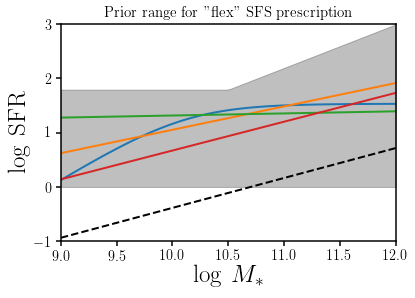

In [59]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.set_title('Prior range for "flex" SFS prescription', fontsize=15)
sub.plot(mbin, logSFR_lee(mbin), c='C0', lw=2, ls='-')
sub.plot(mbin, logSFR_noeske(mbin), c='C1', lw=2, ls='-')
sub.plot(mbin, logSFR_primus(mbin), c='C2', lw=2, ls='-')
sub.plot(mbin, logSFR_hahn(mbin), c='C3', lw=2, ls='-')

sfs_anchored = np.zeros((len(mbin), 4))
sfs_anchored[:,0] = SFH.SFR_sfms(mbin, 1., {'name': 'flex', 'mslope':0.0, 'zslope': 1.})
sfs_anchored[:,1] = SFH.SFR_sfms(mbin, 1., {'name': 'flex', 'mslope':0.0, 'zslope': 2.})
sfs_anchored[:,2] = SFH.SFR_sfms(mbin, 1., {'name': 'flex', 'mslope':0.8, 'zslope': 1.})
sfs_anchored[:,2] = SFH.SFR_sfms(mbin, 1., {'name': 'flex', 'mslope':0.8, 'zslope': 2.})
sub.fill_between(mbin, np.min(sfs_anchored, axis=1), np.max(sfs_anchored, axis=1), color='k', alpha=0.25)

sub.plot(mbin, SFH.SFR_sfms(mbin, 0.05, {'name': 'flex', 'mslope': 0.55, 'zslope': 1.2}), c='k', lw=2, ls='--')
sub.set_xlabel('$\log\,M_*$', fontsize=25)
sub.set_xlim([9., 12.])
sub.set_ylabel('$\log\,\mathrm{SFR}$', fontsize=25)
sub.set_ylim([-1., 3.])

Prior range: $m_{M_*} = [0.0, 0.8], m_z = [1., 2.]$$